

$$\textbf {El MAGHRAOUI AYMANE}$$
$$\textbf {IBRAHYM BADRY}$$




$$Application$$




In [39]:
import numpy as np
import pandas as pd


df = pd.read_csv("Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Missing value in the dataset')

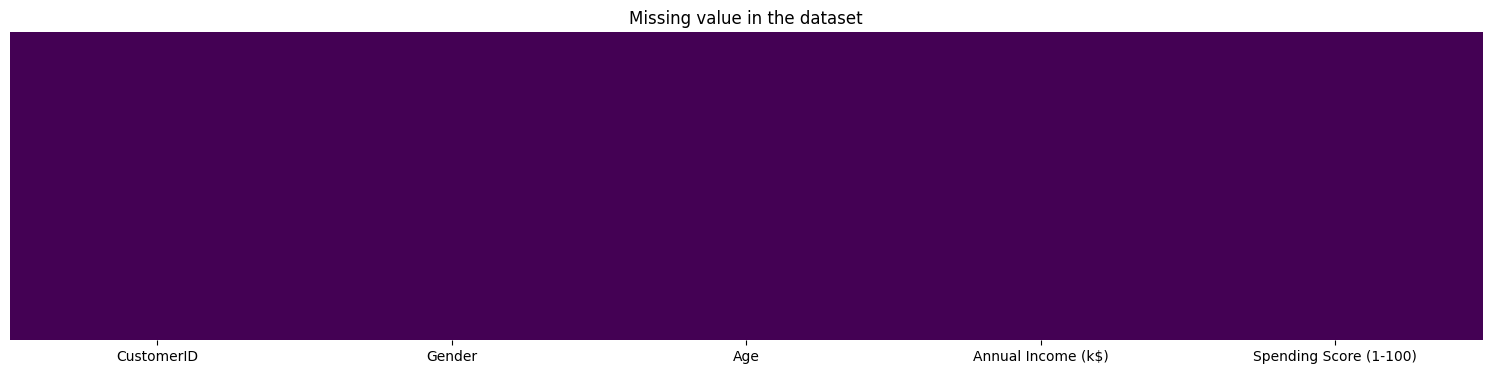

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

There is no missing values

This code help us to defined the missing values.

Text(0.5, 1.0, 'Scatter plot of Annual Income (k$) vs Spending Score (1-100)')

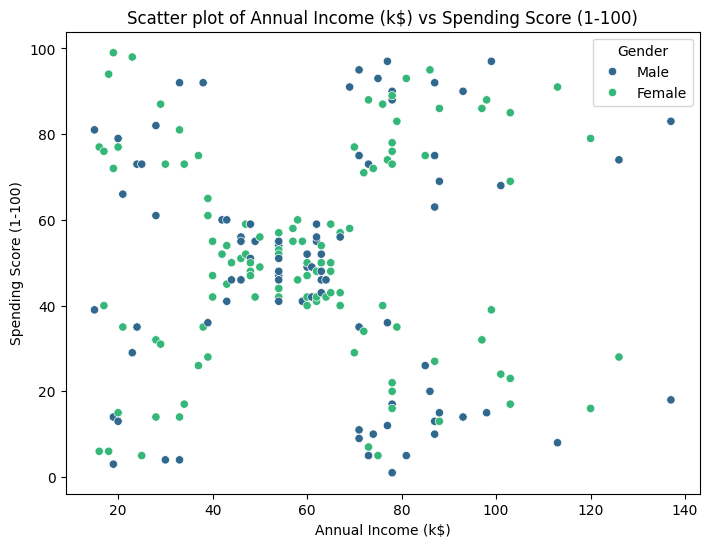

In [5]:
f = plt.figure(figsize=(18,6))

ax = f.add_subplot(121)
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,palette='viridis',hue='Gender',ax=ax)
ax.set_title('Scatter plot of Annual Income (k$) vs Spending Score (1-100)')

In [40]:
df.rename(columns={"Annual Income (k$)":"Annual_Income_K"}, inplace=True)

In [41]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 1 categorical variables

The categorical variables are : ['Gender']


In [42]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 4 numerical variables

The numerical variables are : ['CustomerID', 'Age', 'Annual_Income_K', 'Spending Score (1-100)']


In [8]:
df[numerical].isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df[categorical].isnull().sum()

Gender    0
dtype: int64

On remarque qu'on aucune valeur manquante  

In [10]:
duplicates = df.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


<Axes: >

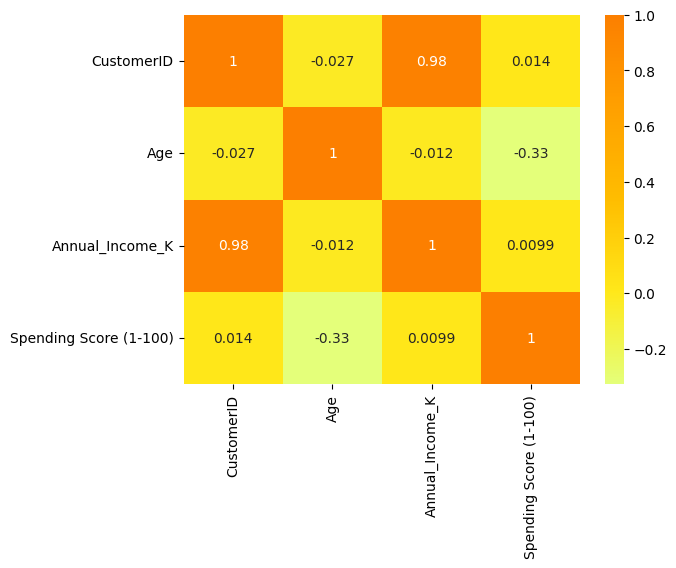

In [26]:
import seaborn as sns

corr = df.select_dtypes('number').corr()

sns.heatmap(corr, cmap = 'Wistia',annot=True)

Text(0, 0.5, 'Spending Score (1-100)')

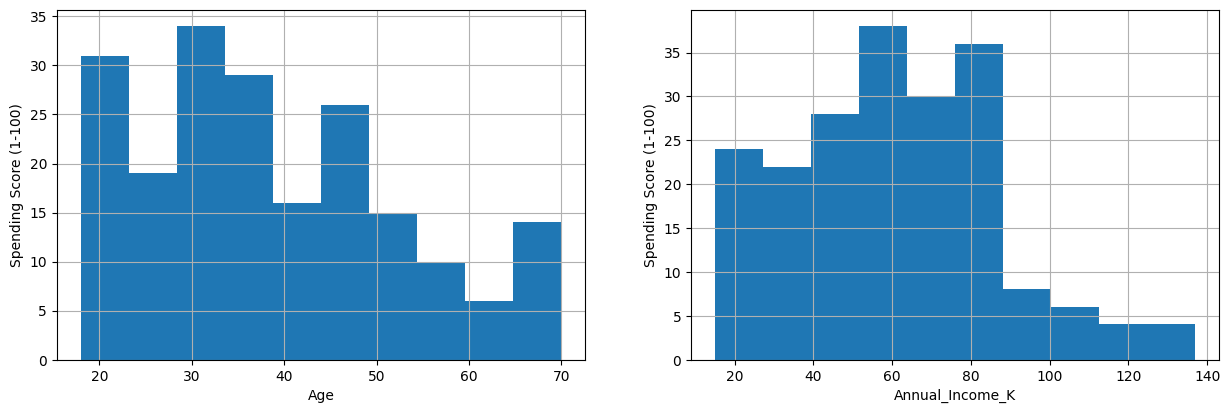

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Age.hist(bins=10)
fig.set_xlabel('Age')
fig.set_ylabel('Spending Score (1-100)')

plt.subplot(2, 2, 2)
fig = df.Annual_Income_K.hist(bins=10)
fig.set_xlabel('Annual_Income_K')
fig.set_ylabel('Spending Score (1-100)')





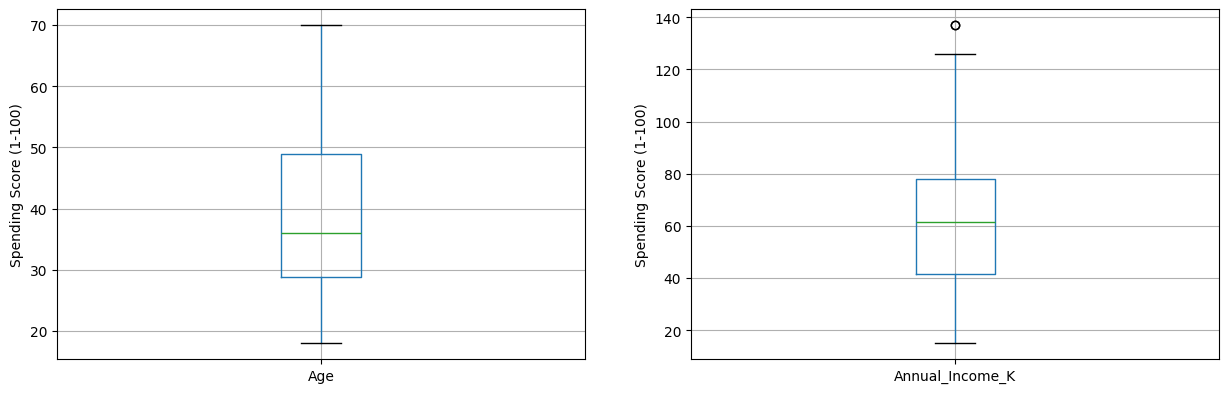

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column="Age")
fig.set_ylabel('Spending Score (1-100)')

plt.subplot(2, 2, 2)
fig = df.boxplot(column="Annual_Income_K")
fig.set_ylabel('Spending Score (1-100)')



plt.show()



In [43]:
def check_and_handle_outliers(df, numerical):

    print("Détecter les valeurs aberrants...")
    outliers_present = False
    
    for col in numerical:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if len(outliers) > 0:
            outliers_present = True
            print(f"\n Column: {col}")
            print(f"Nombre des valeurs aberrants: {len(outliers)}")
            print(f"Bounds: ({lower_bound:.2f}, {upper_bound:.2f})")
            
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    if not outliers_present:
        print("Aucun valeurs aberrant a étè trouver!")
    
    return df

df = check_and_handle_outliers(df, numerical)

print("\n Verification après le traitement...")
check_and_handle_outliers(df, numerical)

Détecter les valeurs aberrants...

 Column: Annual_Income_K
Nombre des valeurs aberrants: 2
Bounds: (-13.25, 132.75)

 Verification après le traitement...
Détecter les valeurs aberrants...
Aucun valeurs aberrant a étè trouver!


,CustomerID,Gender,Age,Annual_Income_K,Spending Score (1-100)
0,1,Male,19,15.00,39
1,2,Male,21,15.00,81
2,3,Female,20,16.00,6
3,4,Female,23,16.00,77
4,5,Female,31,17.00,40
...,...,...,...,...,...
195,196,Female,35,120.00,79
196,197,Female,45,126.00,28
197,198,Male,32,126.00,74
198,199,Male,32,132.75,18


In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])

df.drop("CustomerID", inplace=True, axis=1)

df

,Gender,Age,Annual_Income_K,Spending Score (1-100)
0,1,19,15.00,39
1,1,21,15.00,81
2,0,20,16.00,6
3,0,23,16.00,77
4,0,31,17.00,40
...,...,...,...,...
195,0,35,120.00,79
196,0,45,126.00,28
197,1,32,126.00,74
198,1,32,132.75,18


In [71]:
X = df[["Annual_Income_K","Spending Score (1-100)"]].values
# X = df[["Gender","Age","Annual_Income_K","Spending Score (1-100)"]].values
X

array([[ 15.  ,  39.  ],
       [ 15.  ,  81.  ],
       [ 16.  ,   6.  ],
       [ 16.  ,  77.  ],
       [ 17.  ,  40.  ],
       [ 17.  ,  76.  ],
       [ 18.  ,   6.  ],
       [ 18.  ,  94.  ],
       [ 19.  ,   3.  ],
       [ 19.  ,  72.  ],
       [ 19.  ,  14.  ],
       [ 19.  ,  99.  ],
       [ 20.  ,  15.  ],
       [ 20.  ,  77.  ],
       [ 20.  ,  13.  ],
       [ 20.  ,  79.  ],
       [ 21.  ,  35.  ],
       [ 21.  ,  66.  ],
       [ 23.  ,  29.  ],
       [ 23.  ,  98.  ],
       [ 24.  ,  35.  ],
       [ 24.  ,  73.  ],
       [ 25.  ,   5.  ],
       [ 25.  ,  73.  ],
       [ 28.  ,  14.  ],
       [ 28.  ,  82.  ],
       [ 28.  ,  32.  ],
       [ 28.  ,  61.  ],
       [ 29.  ,  31.  ],
       [ 29.  ,  87.  ],
       [ 30.  ,   4.  ],
       [ 30.  ,  73.  ],
       [ 33.  ,   4.  ],
       [ 33.  ,  92.  ],
       [ 33.  ,  14.  ],
       [ 33.  ,  81.  ],
       [ 34.  ,  17.  ],
       [ 34.  ,  73.  ],
       [ 37.  ,  26.  ],
       [ 37.  ,  75.  ],


Normaliser les valeurs des colonnes du DataFrame M en les transformant dans une plage de [0, 1] à l'aide de MinMaxScaler de scikit-learn.
Remplacer les colonnes normalisées dans le DataFrame M pour une échelle cohérente entre les différentes caractéristiques.

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00849257, 0.05102041],
       [0.00849257, 0.7755102 ],
       [0.01698514, 0.39795918],
       [0.01698514, 0.76530612],
       [0.02547771, 0.05102041],
       [0.02547771, 0.94897959],
       [0.03397028, 0.02040816],
       [0.03397028, 0.7244898 ],
       [0.03397028, 0.13265306],
       [0.03397028, 1.        ],
       [0.04246285, 0.14285714],
       [0.04246285, 0.7755102 ],
       [0.04246285, 0.12244898],
       [0.04246285, 0.79591837],
       [0.05095541, 0.34693878],
       [0.05095541, 0.66326531],
       [0.06794055, 0.28571429],
       [0.06794055, 0.98979592],
       [0.07643312, 0.34693878],
       [0.07643312, 0.73469388],
       [0.08492569, 0.04081633],
       [0.08492569, 0.73469388],
       [0.1104034 , 0.13265306],
       [0.1104034 , 0.82653061],
       [0.1104034 , 0.31632653],
       [0.1104034 , 0.6122449 ],
       [0.11889597, 0.30612245],
       [0.11889597, 0.87755102],
       [0.

[[0.3822995  0.31163817]
 [0.39187481 0.73950929]]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
Inertie : 14.57992736436853
Silhouette Score : 0.327
K =  2


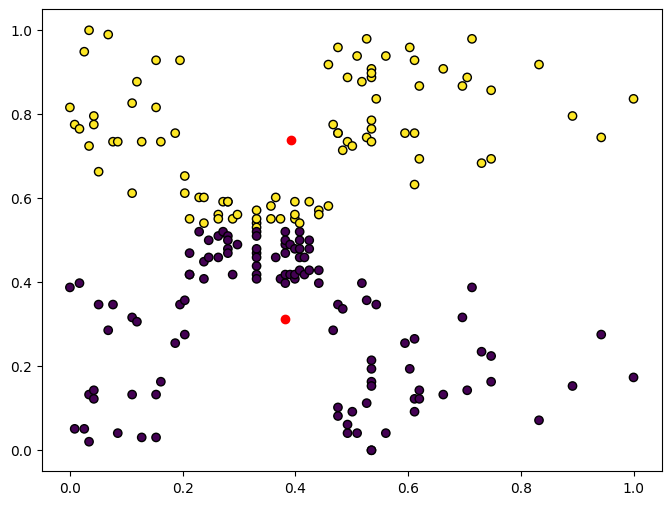

[[0.48352442 0.1577551 ]
 [0.60661985 0.82783883]
 [0.26556493 0.5426549 ]]
[2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 2 0 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
Inertie : 9.394273651281345
Silhouette Score : 0.451
K =  3


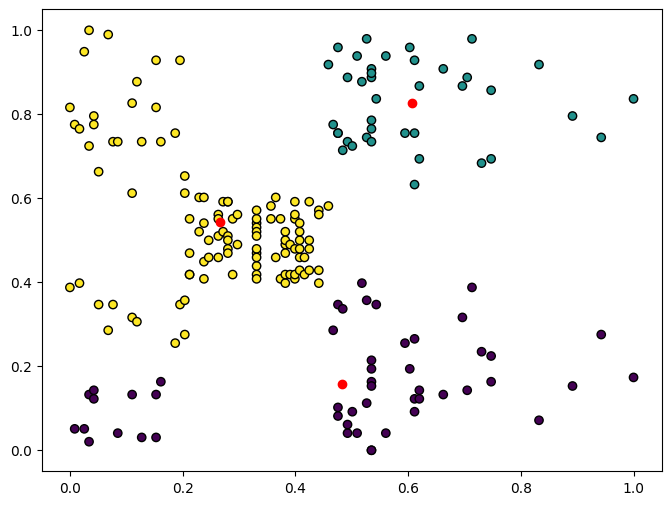

[[0.28776743 0.43053375]
 [0.60661985 0.82783883]
 [0.0911021  0.79962894]
 [0.62062481 0.16443149]]
[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
Inertie : 6.276695529846629
Silhouette Score : 0.498
K =  4


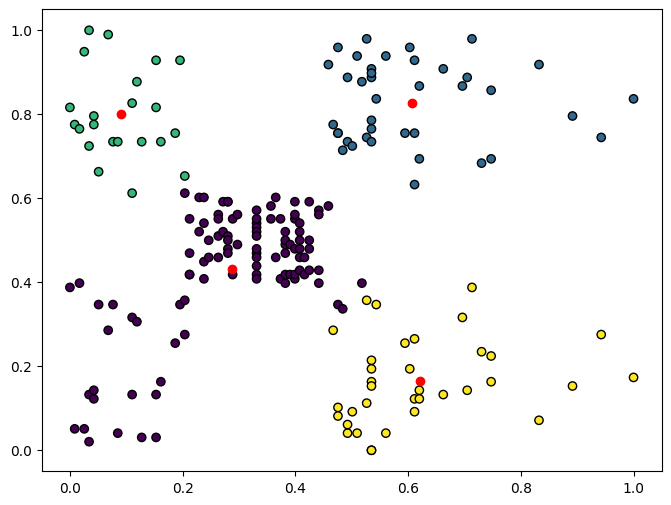

[[0.3405313  0.49340468]
 [0.60661985 0.82783883]
 [0.0911021  0.79962894]
 [0.62062481 0.16443149]
 [0.0911021  0.19619666]]
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 0 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
Inertie : 3.665274881528352
Silhouette Score : 0.561
K =  5


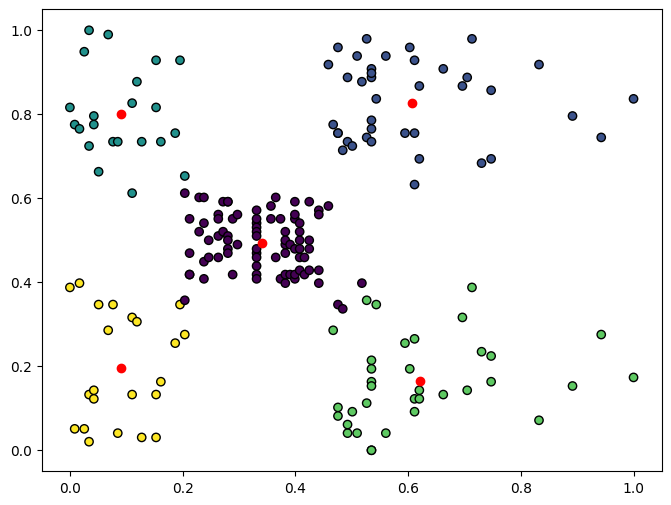

[[0.34221908 0.49193752]
 [0.60661985 0.82783883]
 [0.09002123 0.72585034]
 [0.62062481 0.16443149]
 [0.0911021  0.19619666]
 [0.10721868 0.91454082]]
[4 2 4 2 4 2 4 5 4 2 4 5 4 2 4 2 4 2 4 5 4 2 4 2 4 5 4 2 4 5 4 2 4 5 4 5 4
 2 4 2 4 5 0 2 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
Inertie : 3.490493120979161
Silhouette Score : 0.525
K =  6


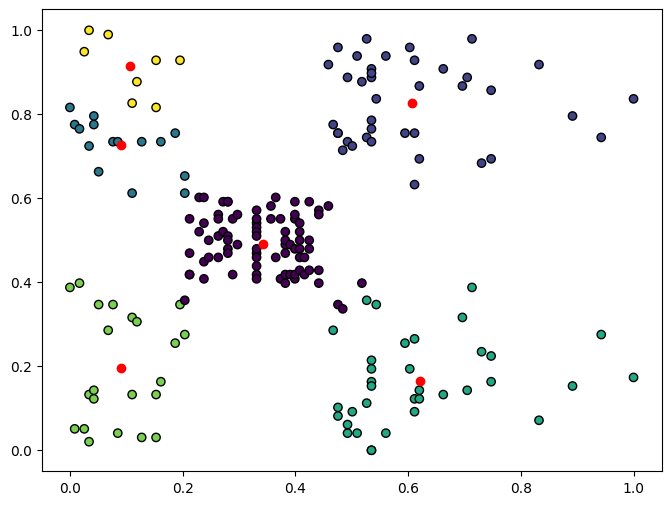

[[0.34221908 0.49193752]
 [0.7880718  0.83395176]
 [0.09002123 0.72585034]
 [0.62062481 0.16443149]
 [0.0911021  0.19619666]
 [0.10721868 0.91454082]
 [0.53533515 0.82543732]]
[4 2 4 2 4 2 4 5 4 2 4 5 4 2 4 2 4 2 4 5 4 2 4 2 4 5 4 2 4 5 4 2 4 5 4 5 4
 2 4 2 4 5 0 2 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 6 3 6 0 6 3 6 3 6 0 6 3 6 3 6 3 6 3 6 0 6 3 6 3 6
 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
Inertie : 2.9854654512441927
Silhouette Score : 0.507
K =  7


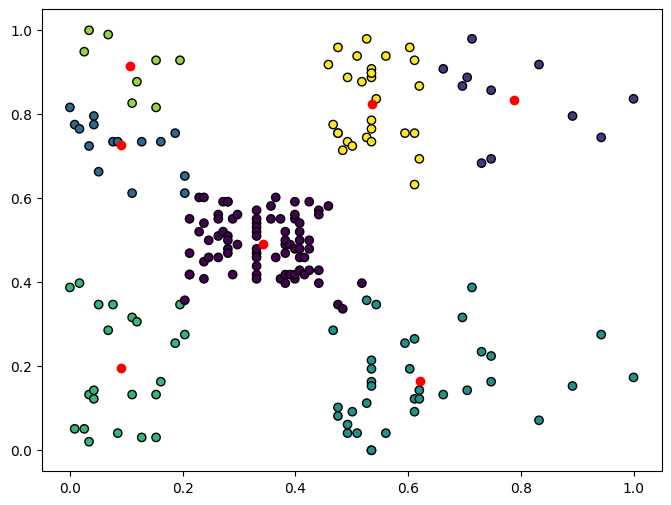

[[0.33970276 0.50510204]
 [0.7880718  0.83395176]
 [0.63088779 0.12320484]
 [0.0911021  0.79962894]
 [0.08138712 0.08758503]
 [0.53533515 0.82543732]
 [0.13527449 0.34766764]
 [0.55060156 0.32568027]]
[6 3 4 3 6 3 4 3 4 3 4 3 4 3 4 3 6 3 6 3 6 3 4 3 4 3 6 3 6 3 4 3 4 3 4 3 4
 3 6 3 6 3 6 0 6 3 0 0 6 6 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 7 0 5 7 5 7 5 2 5 2 5 7 5 2 5 2 5 2 5 2 5 7 5 2 5 7 5
 7 5 2 5 2 5 2 5 2 5 2 5 7 5 2 5 7 5 2 5 7 5 2 5 2 5 2 5 2 5 2 1 7 1 2 1 7
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
Inertie : 2.4827372376774504
Silhouette Score : 0.458
K =  8


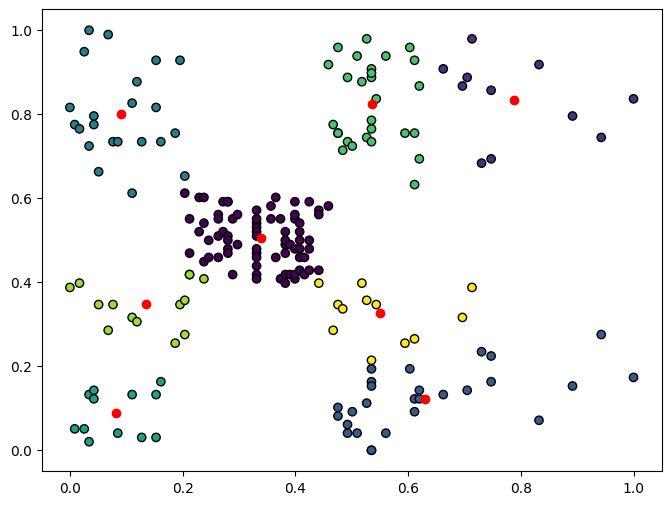

[[0.34460692 0.50086232]
 [0.7880718  0.83395176]
 [0.63088779 0.12320484]
 [0.0744733  0.86499215]
 [0.08138712 0.08758503]
 [0.53533515 0.82543732]
 [0.13527449 0.34766764]
 [0.55060156 0.32568027]
 [0.14225053 0.68027211]]
[6 3 4 3 6 3 4 3 4 8 4 3 4 3 4 3 6 8 6 3 6 8 4 8 4 3 6 8 6 3 4 8 4 3 4 3 4
 8 6 8 6 3 6 8 6 8 0 0 6 6 0 8 0 8 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 7 0 5 7 5 7 5 2 5 2 5 7 5 2 5 2 5 2 5 2 5 7 5 2 5 7 5
 7 5 2 5 2 5 2 5 2 5 2 5 7 5 2 5 7 5 2 5 7 5 2 5 2 5 2 5 2 5 2 1 7 1 2 1 7
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
Inertie : 2.313476299803857
Silhouette Score : 0.420
K =  9


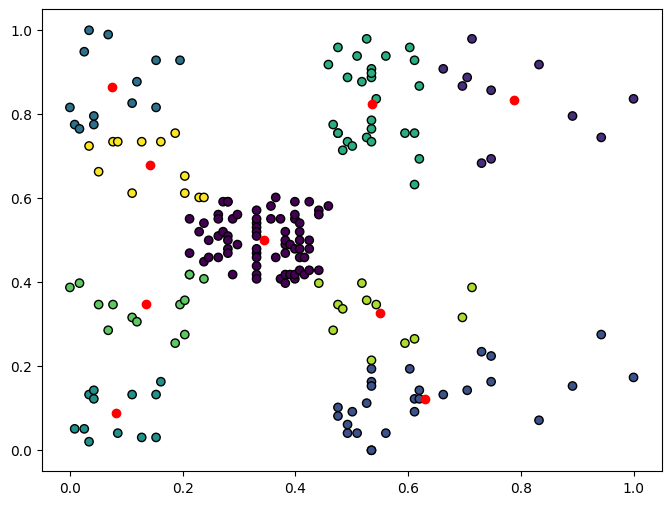

[[0.34460692 0.50086232]
 [0.7880718  0.83395176]
 [0.54861996 0.10510204]
 [0.0744733  0.86499215]
 [0.08138712 0.08758503]
 [0.53533515 0.82543732]
 [0.13527449 0.34766764]
 [0.55201699 0.33580705]
 [0.14225053 0.68027211]
 [0.82457537 0.17984694]]
[6 3 4 3 6 3 4 3 4 8 4 3 4 3 4 3 6 8 6 3 6 8 4 8 4 3 6 8 6 3 4 8 4 3 4 3 4
 8 6 8 6 3 6 8 6 8 0 0 6 6 0 8 0 8 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 7 0 5 7 5 7 5 2 5 2 5 7 5 2 5 2 5 2 5 2 5 7 5 2 5 7 5
 2 5 2 5 2 5 2 5 2 5 2 5 7 5 2 5 7 5 2 5 7 5 2 5 2 5 2 5 2 5 2 1 7 1 9 1 7
 1 9 1 9 1 9 1 9 1 9 1 9 1 9 1]
Inertie : 1.8494593133775954
Silhouette Score : 0.447
K =  10


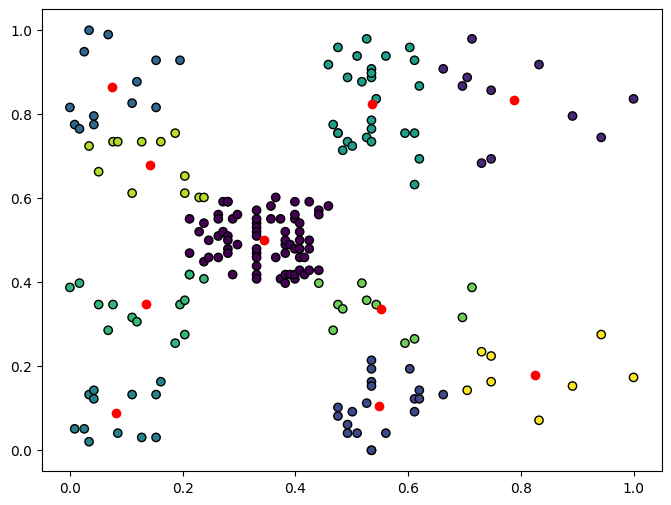

[[0.27940552 0.50484694]
 [0.7880718  0.83395176]
 [0.54861996 0.10510204]
 [0.0744733  0.86499215]
 [0.08138712 0.08758503]
 [0.53533515 0.82543732]
 [0.1119475  0.32931354]
 [0.56305732 0.32959184]
 [0.12399151 0.69591837]
 [0.82457537 0.17984694]
 [0.40167556 0.49227799]]
[ 6  3  4  3  6  3  4  3  4  8  4  3  4  3  4  3  6  8  6  3  6  8  4  8
  4  3  6  8  6  3  4  8  4  3  4  3  4  8  6  8  6  3  6  8  6  8  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10  5  7  5  7  5  2  5  2  5  7  5  2  5  2  5  2  5  2  5  7  5
  2  5  7  5  2  5  2  5  2  5  2  5  2  5  2  5  7  5  2  5  7  5  2  5
  7  5  2  5  2  5  2  5  2  5  2  1  7  1  9  1  7  1  9  1  9  1  9  1
  9  1  9  1  9  1  9  1]
Inertie : 1.591228179600661
Silhouette Score : 0.410
K =  11


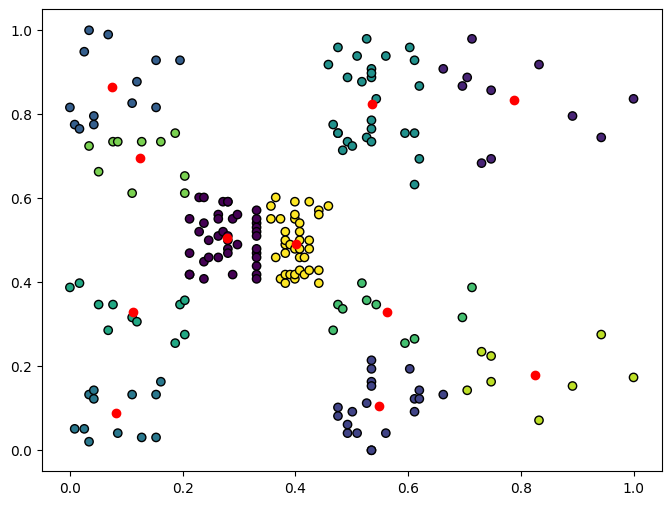

[[0.27940552 0.50484694]
 [0.57230479 0.91269841]
 [0.54861996 0.10510204]
 [0.0744733  0.86499215]
 [0.08138712 0.08758503]
 [0.53321201 0.73760933]
 [0.1119475  0.32931354]
 [0.56305732 0.32959184]
 [0.12399151 0.69591837]
 [0.82457537 0.17984694]
 [0.40167556 0.49227799]
 [0.84167425 0.79008746]]
[ 6  3  4  3  6  3  4  3  4  8  4  3  4  3  4  3  6  8  6  3  6  8  4  8
  4  3  6  8  6  3  4  8  4  3  4  3  4  8  6  8  6  3  6  8  6  8  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10  1  7  5  7  1  2  5  2  5  7  5  2  1  2  5  2  5  2  1  7  1
  2  1  7  5  2  1  2  1  2  5  2  1  2  5  2  5  7  1  2  1  7  5  2  1
  7  5  2  5  2  1  2  1  2  5  2  1  7  1  9  1  7  1  9 11  9 11  9 11
  9 11  9 11  9 11  9 11]
Inertie : 1.3592885651293598
Silhouette Score : 0.415
K =  12


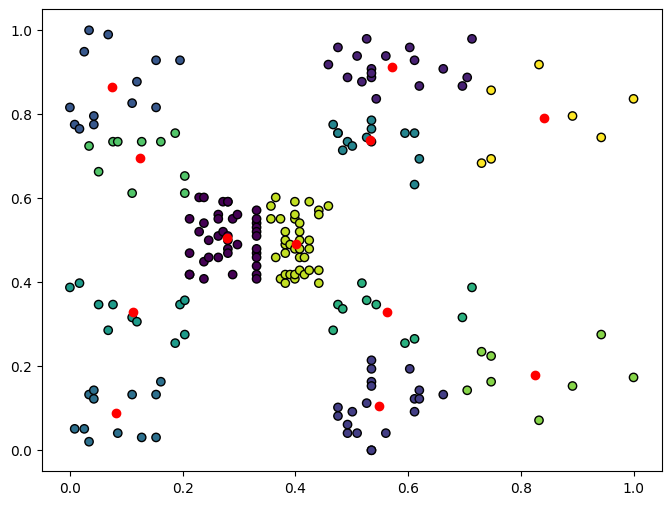

[[0.28717465 0.47430083]
 [0.57230479 0.91269841]
 [0.54861996 0.10510204]
 [0.0403397  0.81037415]
 [0.08138712 0.08758503]
 [0.53321201 0.73760933]
 [0.1119475  0.32931354]
 [0.56305732 0.32959184]
 [0.1507431  0.8252551 ]
 [0.82457537 0.17984694]
 [0.40167556 0.49227799]
 [0.84167425 0.79008746]
 [0.2462845  0.57908163]]
[ 6  3  4  3  6  3  4  3  4  3  4  3  4  3  4  3  6  3  6  3  6  3  4  3
  4  8  6 12  6  8  4  8  4  8  4  8  4  8  6  8  6  8  6 12  6 12 12  0
  0  0 12 12 12 12  0  0  0  0  0  0 12 12  0 12  0 12  0  0 12  0 12  0
  0 12  0  0  0  0  0  0  0  0  0  0 12  0 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10  1  7  5  7  1  2  5  2  5  7  5  2  1  2  5  2  5  2  1  7  1
  2  1  7  5  2  1  2  1  2  5  2  1  2  5  2  5  7  1  2  1  7  5  2  1
  7  5  2  5  2  1  2  1  2  5  2  1  7  1  9  1  7  1  9 11  9 11  9 11
  9 11  9 11  9 11  9 11]
Inertie : 1.30576740042599
Silhouette Score : 0.401
K =  13


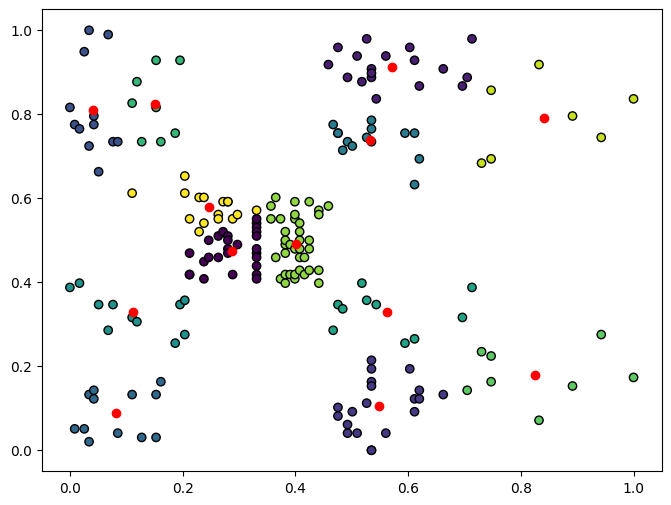

[[0.28717465 0.47430083]
 [0.57230479 0.91269841]
 [0.53450106 0.08864796]
 [0.0403397  0.81037415]
 [0.08138712 0.08758503]
 [0.53321201 0.73760933]
 [0.1119475  0.32931354]
 [0.54692144 0.31938776]
 [0.1507431  0.8252551 ]
 [0.9447983  0.20068027]
 [0.40167556 0.49227799]
 [0.84167425 0.79008746]
 [0.2462845  0.57908163]
 [0.70488323 0.18027211]]
[ 6  3  4  3  6  3  4  3  4  3  4  3  4  3  4  3  6  3  6  3  6  3  4  3
  4  8  6 12  6  8  4  8  4  8  4  8  4  8  6  8  6  8  6 12  6 12 12  0
  0  0 12 12 12 12  0  0  0  0  0  0 12 12  0 12  0 12  0  0 12  0 12  0
  0 12  0  0  0  0  0  0  0  0  0  0 12  0 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10  1  7  5  7  1  2  5  2  5  7  5  2  1  2  5  2  5  2  1  7  1
  2  1  7  5  7  1  2  1  2  5  2  1  2  5  2  5  7  1  2  1  7  5 13  1
  7  5  2  5  2  1  2  1 13  5 13  1 13  1 13  1  7  1 13 11 13 11 13 11
 13 11  9 11  9 11  9 11]
Inertie : 1.230084007243583
Silhouette 

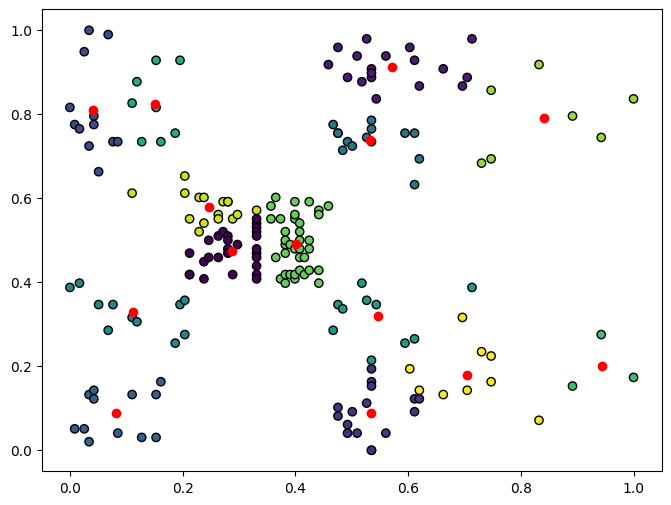

[[0.28717465 0.47430083]
 [0.67940552 0.89941691]
 [0.53450106 0.08864796]
 [0.0403397  0.81037415]
 [0.08138712 0.08758503]
 [0.53321201 0.73760933]
 [0.1119475  0.32931354]
 [0.54692144 0.31938776]
 [0.1507431  0.8252551 ]
 [0.9447983  0.20068027]
 [0.40167556 0.49227799]
 [0.85739561 0.77891156]
 [0.2462845  0.57908163]
 [0.70488323 0.18027211]
 [0.52441614 0.91581633]]
[ 6  3  4  3  6  3  4  3  4  3  4  3  4  3  4  3  6  3  6  3  6  3  4  3
  4  8  6 12  6  8  4  8  4  8  4  8  4  8  6  8  6  8  6 12  6 12 12  0
  0  0 12 12 12 12  0  0  0  0  0  0 12 12  0 12  0 12  0  0 12  0 12  0
  0 12  0  0  0  0  0  0  0  0  0  0 12  0 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 14  7  5  7 14  2  5  2  5  7  5  2 14  2  5  2  5  2 14  7 14
  2 14  7  5  7 14  2 14  2  5  2 14  2  5  2  5  7 14  2 14  7  5 13 14
  7  5  2  5  2  1  2  1 13  5 13  1 13  1 13  1  7  1 13 11 13  1 13 11
 13 11  9 11  9 11  9 11]
Inertie : 1.13

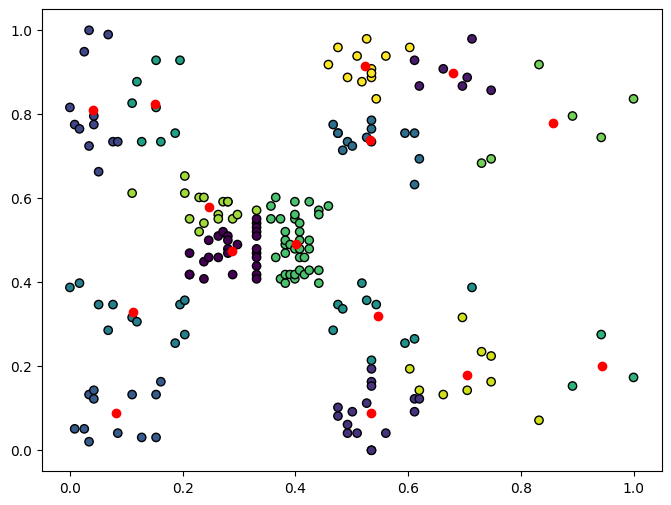

In [109]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

liste = range(2,16)
for i in liste:
    km = KMeans(i,init='k-means++',max_iter=1000 ,random_state = 42)
    km.fit(X)

    print(km.cluster_centers_)

    x_predict = km.predict(X)
    print(x_predict)

    # Inertie
    print(f"Inertie : {km.inertia_}")

    # Calcul du silhouette score
    score = silhouette_score(X, km.labels_)
    print(f"Silhouette Score : {score:.3f}")
    print("K = ",i)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=x_predict,edgecolor='k')
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red')
    plt.show()


D'apres les deux metrics silhouette et l'Inertie plus la visualisation le meilleur K est lui qui est égale à 5

[[0.53874735 0.74348073]
 [0.28167021 0.39419339]]
[1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0
 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0]
Inertie : 16.236403361406403
Silhouette Score : 0.366
K =  2


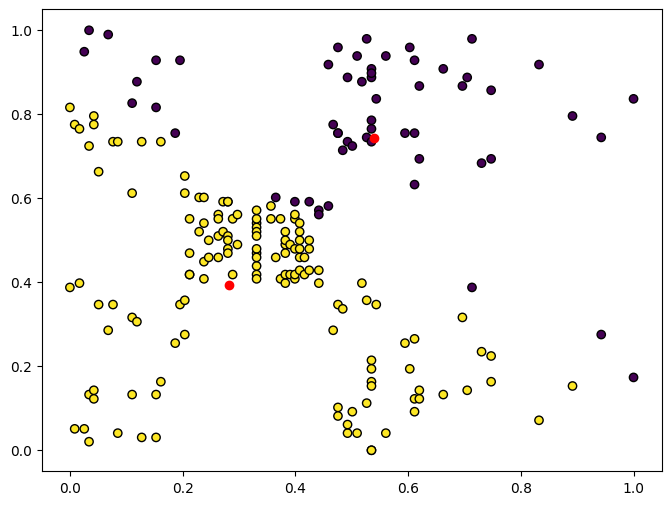

[[0.59471374 0.82964372]
 [0.24756782 0.5692517 ]
 [0.4467371  0.22552853]]
[1 1 2 1 1 1 2 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 2 1 2
 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1 2 1 1
 1 2 1 1 1 2 1 2 1 1 2 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]
Inertie : 9.633286538347221
Silhouette Score : 0.408
K =  3


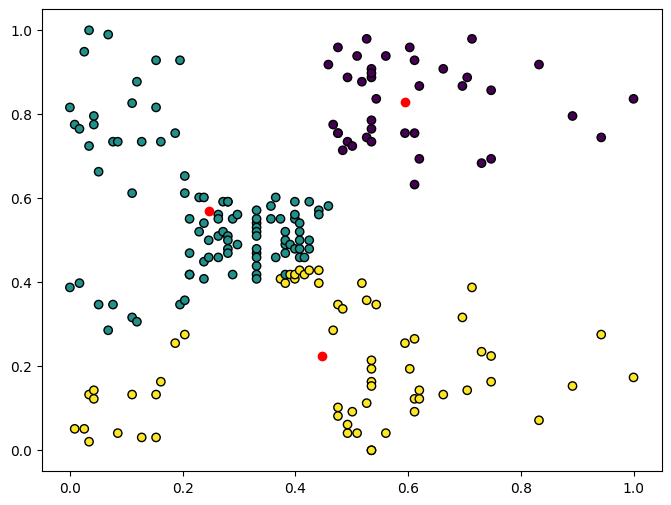

[[0.59878248 0.83249052]
 [0.08925863 0.78862974]
 [0.60556217 0.18580399]
 [0.28115062 0.43124085]]
[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]
Inertie : 6.2920226191476285
Silhouette Score : 0.497
K =  4


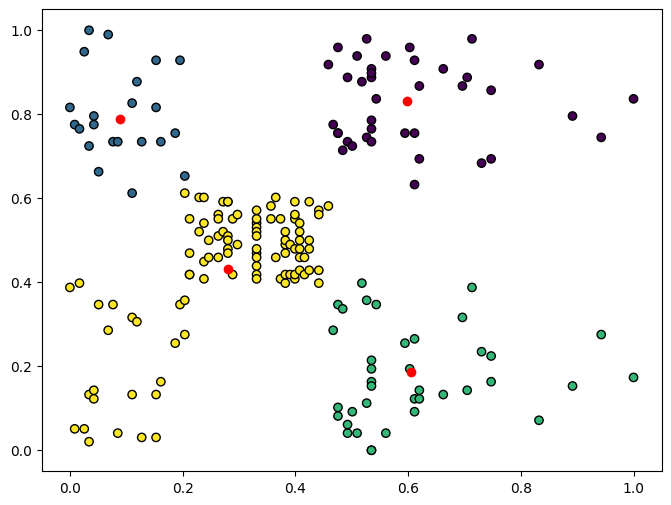

[[0.6001025  0.8338494 ]
 [0.09280062 0.80315399]
 [0.09920305 0.23203194]
 [0.34723992 0.48945578]
 [0.57899133 0.16117431]]
[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 3 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 4 0 3 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 3 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]
Inertie : 3.7506848731766347
Silhouette Score : 0.559
K =  5


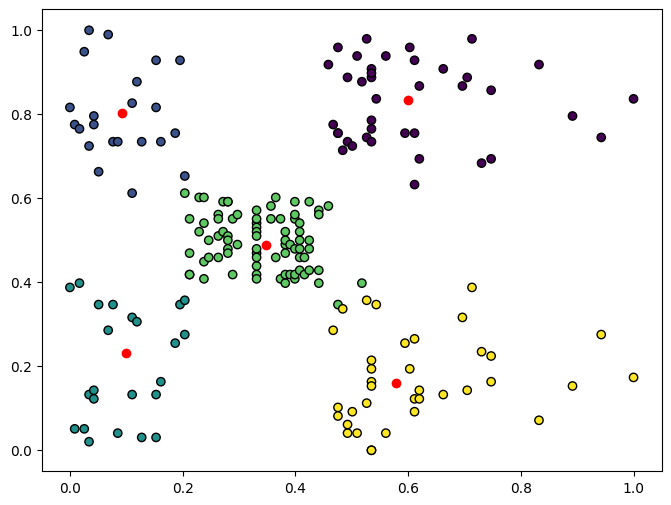

[[0.59900795 0.83240022]
 [0.12473461 0.75015944]
 [0.25174401 0.46032903]
 [0.48941746 0.34141156]
 [0.08856536 0.04154519]
 [0.09988879 0.19484937]]
[5 1 4 1 5 1 4 1 4 1 5 1 5 1 5 1 5 1 5 1 5 1 4 1 5 1 5 1 5 1 4 1 4 1 5 1 5
 1 5 1 2 1 2 1 5 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 3 2 3 2 2 2 2 3 2 3 3 2 2
 2 3 3 3 3 3 2 3 2 2 3 2 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]
Inertie : 5.649034645397956
Silhouette Score : 0.439
K =  6


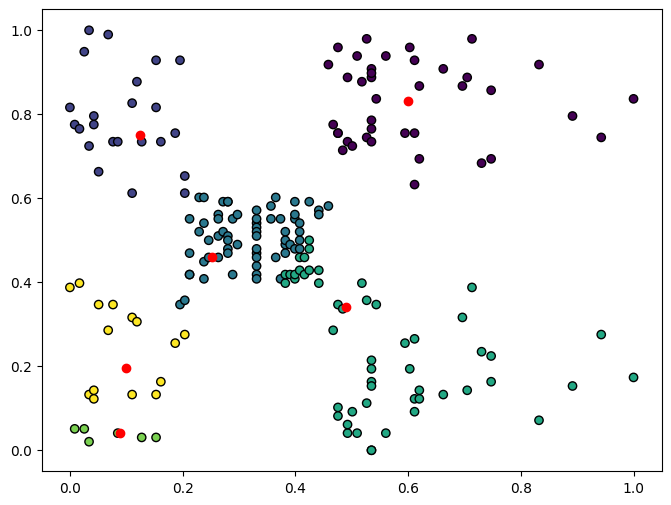

[[0.77824338 0.81471536]
 [0.08137066 0.84575225]
 [0.22811435 0.59776934]
 [0.36690552 0.47789116]
 [0.10381215 0.29439537]
 [0.53314461 0.83333333]
 [0.54342864 0.17492711]]
[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 2 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 2 4 2 2 2 4 4 2 2 2 2 3 3 2 3 2 3 2 2 2 2 3 2 3 3 2 3 2 3 3 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 5 6 5 3 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 3 5 6 5 6 5
 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 0 6 0 6 0 6
 0 6 0 6 0 6 0 6 0 6 0 6 0 6 0]
Inertie : 3.3176027344178216
Silhouette Score : 0.410
K =  7


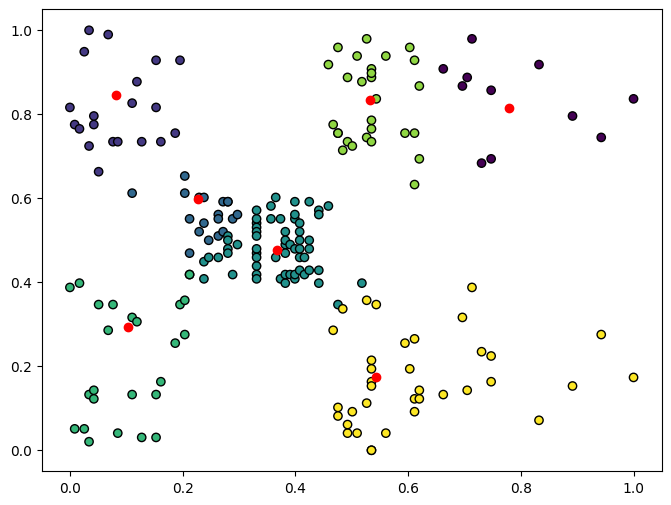

[[0.10089172 0.77489796]
 [0.41141779 0.42131519]
 [0.62190617 0.14830864]
 [0.40622788 0.54567541]
 [0.09094126 0.08715986]
 [0.58632249 0.83413892]
 [0.25896355 0.52299511]
 [0.11252654 0.31997085]]
[7 0 4 0 7 0 4 0 4 0 4 0 4 0 4 0 7 0 7 0 7 0 4 0 4 0 7 0 7 0 4 0 4 0 4 0 4
 0 7 0 7 0 7 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 1 6 3 1 1 3 1 3 3 3 1 3 1 3 1 1 3 1 3 1 3 1 1 3 3 3 1 3 1 1 1 3
 3 1 1 1 3 1 3 1 3 3 1 3 5 1 5 1 5 2 5 2 5 1 5 2 5 2 5 2 5 2 5 1 5 2 5 1 5
 2 5 2 5 2 5 2 5 2 5 2 5 1 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2
 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5]
Inertie : 2.774161693930801
Silhouette Score : 0.425
K =  8


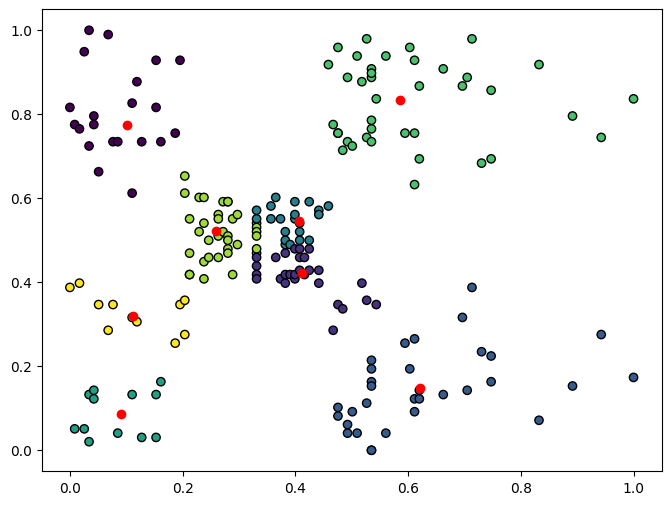

[[0.50176929 0.10544218]
 [0.63092711 0.79965986]
 [0.66302699 0.16763848]
 [0.40316112 0.48356009]
 [0.08128602 0.09912536]
 [0.30804864 0.90445269]
 [0.22611465 0.57057823]
 [0.0955414  0.33163265]
 [0.15286624 0.03061224]]
[7 5 4 6 7 6 4 5 4 6 4 5 4 6 4 5 7 6 7 5 7 6 4 6 4 5 7 6 7 5 8 6 8 5 4 5 4
 6 7 6 7 5 7 6 7 6 6 6 7 7 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 3 3 6
 3 3 3 3 3 3 3 3 3 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 5 0 1 3 5 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
Inertie : 3.5301828343252177
Silhouette Score : 0.373
K =  9


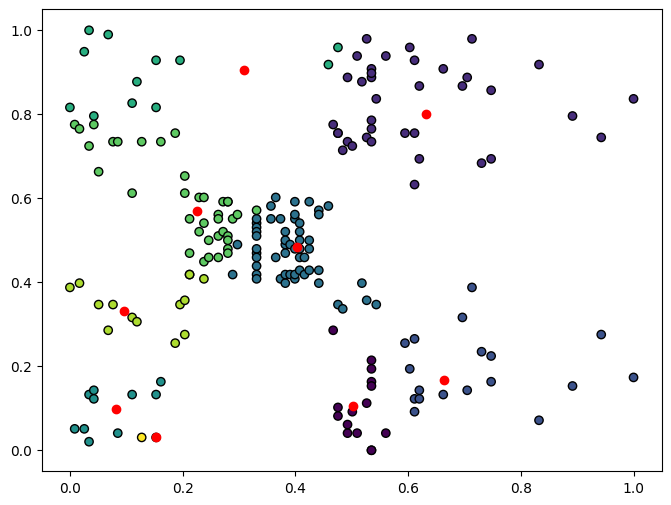

[[0.24062279 0.5505345 ]
 [0.09907997 0.83560091]
 [0.62360934 0.14367347]
 [0.40626614 0.47876448]
 [0.06794055 0.08843537]
 [0.70226052 0.8697479 ]
 [0.52229299 0.76190476]
 [0.13466788 0.31632653]
 [0.15286624 0.03061224]
 [0.01132343 0.39455782]]
[9 1 4 1 9 1 4 1 4 1 4 1 4 1 4 1 9 1 7 1 7 1 4 1 4 1 7 0 7 1 8 1 8 1 4 1 4
 1 7 1 7 1 7 0 7 0 0 0 7 7 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 3 0 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 6 3 6 3 6 2 6 2 6 3 6 2 6 2 6 2 6 2 6 3 6 2 5 3 6
 2 6 2 6 2 6 2 6 2 6 2 6 3 6 2 5 2 6 2 5 2 6 2 6 2 5 2 5 2 6 2 5 2 5 2 5 2
 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5]
Inertie : 2.5272792911380613
Silhouette Score : 0.394
K =  10


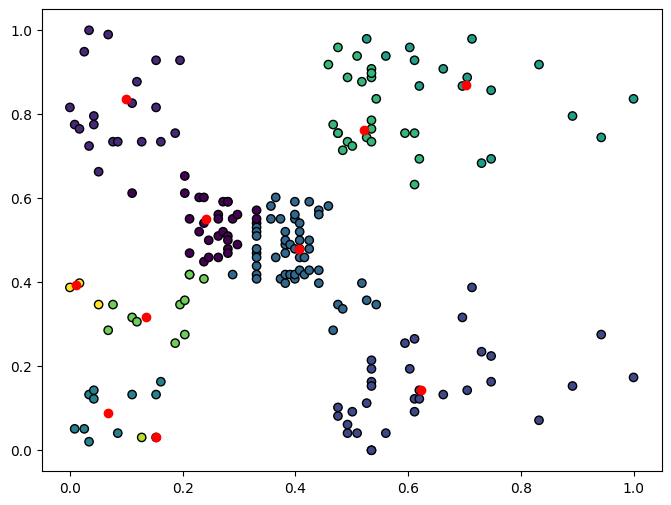

[[0.53044127 0.1241037 ]
 [0.0880139  0.78942486]
 [0.51380042 0.03968254]
 [0.14744043 0.33390023]
 [0.08832272 0.08911565]
 [0.71597965 0.867732  ]
 [0.19359591 0.50957934]
 [0.06467418 0.96703297]
 [0.52267902 0.81006494]
 [0.68044969 0.25192372]
 [0.36308015 0.48930217]]
[ 3  1  4  1  3  1  4  7  4  1  4  7  4  1  4  1  3  1  3  7  3  1  4  1
  4  1  3  6  3  1  4  1  4  7  4  1  4  1  3  1  3  7  3  6  3  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 10  6 10 10  6 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10  8  0  8 10  8  0  8  2  8 10  8  2  8  2  8  0  8  2  8 10  8
  0  8  9  8  0  8  0  8  0  8  0  8  2  8  2  8  9  8  2  8  9  8  9  5
  9  8  0  8  0  5  0  5  0  8  9  5  9  5  9  5  9  5  9  5  9  5  9  5
  9  5  9  5  9  5  9  5]
Inertie : 2.059309787216284
Silhouette Score : 0.364
K =  11


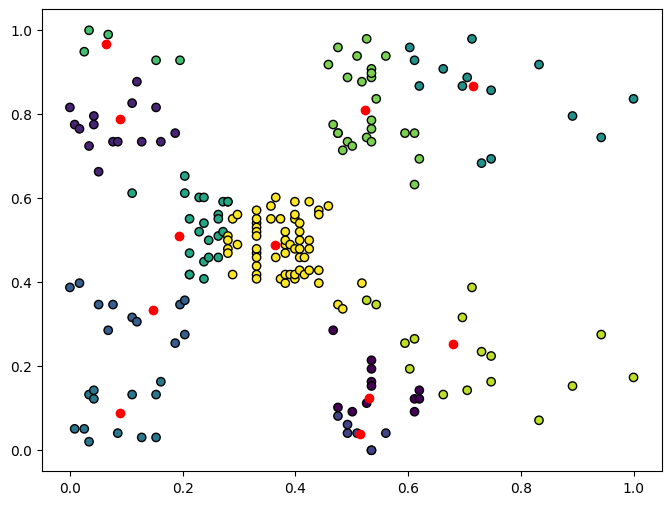

[[0.37995015 0.43500444]
 [0.25801233 0.47521866]
 [0.39002909 0.50340136]
 [0.47722759 0.37788018]
 [0.10170369 0.19885515]
 [0.51791605 0.81946625]
 [0.22326517 0.60687433]
 [0.5227648  0.10147392]
 [0.70922182 0.84782609]
 [0.75126062 0.21077806]
 [0.4069356  0.56164966]
 [0.07147912 0.84552154]]
[ 4 11  4 11  4 11  4 11  4 11  4 11  4 11  4 11  4  6  4 11  4 11  4 11
  4 11  4  6  4 11  4 11  4 11  4 11  4  6  4 11  1 11  1  6  4  6  6  1
  1  1  1  6  6  6  1  1  1  1  1  1  6  6  1  6  1  6  1  1  6  1  1  1
  1  6  0  2  2  2  2  0  2  2  0  0 10  0 10 10 10  0 10  0  2  0  0  2
  0  2  0  2  0  2 10 10 10  0  2  0  0  2  2 10  0  0  2  2  0 10  3 10
 10  3 10  5  3  5  3  5  7  5  7  5  3  5  7  5  7  5  7  5  7  5  3  5
  7  5  3  5  7  5  7  5  7  5  7  5  7  5  7  5  3  5  7  5  9  5  7  8
  9  5  7  5  7  8  7  8  7  5  9  8  9  8  9  8  9  8  9  8  9  8  9  8
  9  8  9  8  9  8  9  8]
Inertie : 1.9417448116288591
Silhouette Score : 0.362
K =  12


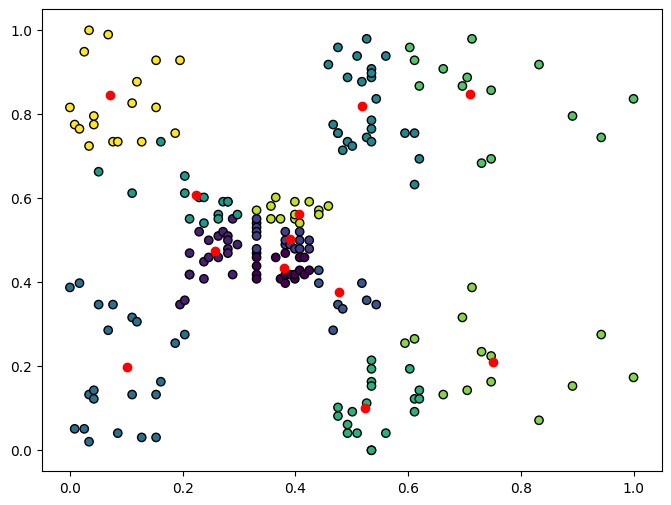

[[0.15610151 0.28571429]
 [0.56074546 0.32964853]
 [0.50694104 0.06698064]
 [0.39784855 0.46585034]
 [0.63354565 0.12380952]
 [0.53046509 0.83596457]
 [0.25967663 0.52511774]
 [0.03963199 0.35519922]
 [0.7738348  0.84135083]
 [0.80665708 0.20671494]
 [0.09795739 0.80559465]
 [0.55060156 0.17913832]
 [0.08014862 0.08131378]]
[ 7 10 12 10  7 10 12 10 12 10 12 10 12 10 12 10  7 10  7 10  7 10 12 10
 12 10  0  6  0 10 12 10 12 10 12 10 12 10  0 10  0 10  0  6  0  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  3  6  6  3  6  3  6  6  3  3  6  3  6  3  6  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  5  1  5  1  5  2  5  2  5  1  5  2  5  2  5  2  5  2  5  1  5
  2  5  1  5 11  5 11  5 11  5 11  5  2  5  2  5  1  5  2  5  1  5 11  5
  1  5  4  5  4  5  4  5  4  5  4  8  1  8  4  8  1  8  9  8  9  8  9  8
  9  8  9  8  9  8  9  8]
Inertie : 1.5886406211542456
Silhouette Score : 0.418
K =  13


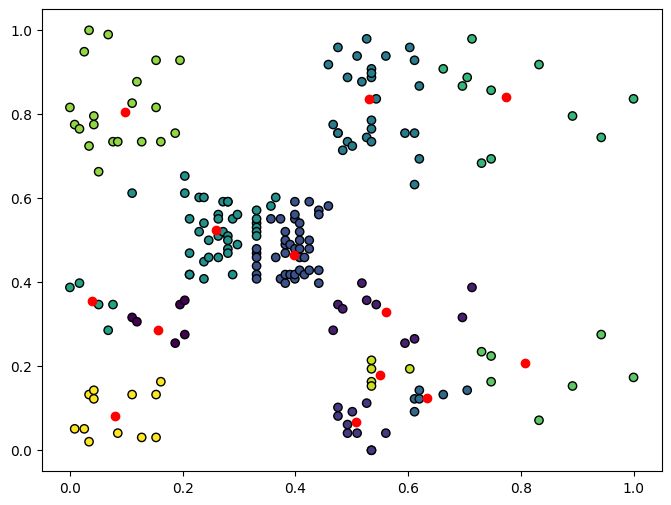

[[0.11404307 0.31049563]
 [0.08415364 0.91326531]
 [0.53148041 0.10037106]
 [0.39031847 0.46669388]
 [0.5410081  0.34769463]
 [0.63474715 0.88218924]
 [0.05838641 0.13647959]
 [0.03882317 0.36734694]
 [0.1718112  0.22056515]
 [0.77398186 0.20037106]
 [0.50798144 0.71674225]
 [0.25542208 0.52467063]
 [0.07190375 0.04217687]
 [0.09766454 0.7244898 ]]
[ 7  1 12 13  7 13 12  1 12 13  6  1  6 13  6 13  7 13  0  1  7 13 12 13
  6  1  0 13  0  1 12 13 12  1  8 13  8 13  8 13  0  1  0 11  8 13 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11  3 11 11  3 11  3  3 11  3  3 11  3 11  3 11  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  5  4 10  4  5  2 10  2 10  4 10  2  5  2 10  2 10  2  5  4  5
  2  5  4 10  2  5  2  5  2 10  2  5  2 10  2 10  4  5  2  5  4 10  2  5
  4 10  2 10  2  5  2  5  2 10  9  5  9  5  9  5  4  5  9  5  9  5  9  5
  9  5  9  5  9  5  9  5]
Inertie : 1.7642611398220833
Silhouette

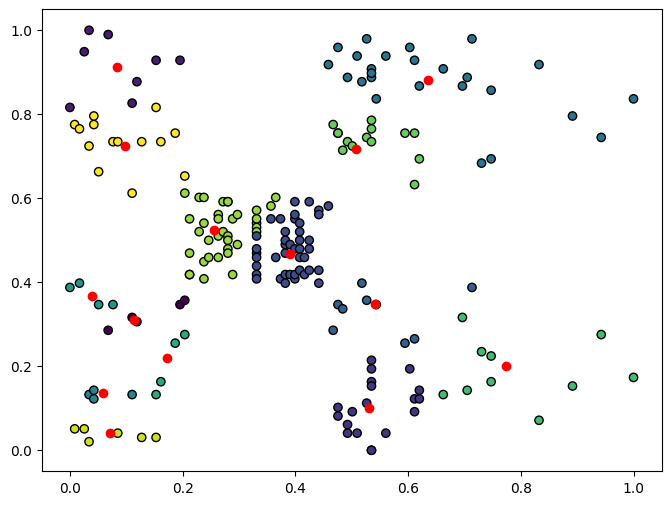

[[0.79572338 0.19533528]
 [0.30874598 0.4680711 ]
 [0.53455114 0.10146323]
 [0.40813139 0.4398311 ]
 [0.08032555 0.7372449 ]
 [0.52302511 0.84330284]
 [0.25053079 0.58404941]
 [0.10860194 0.31292517]
 [0.23864119 0.47823129]
 [0.55742135 0.32050093]
 [0.7405992  0.80884354]
 [0.38877094 0.55555556]
 [0.08198595 0.08359498]
 [0.70658174 0.35918367]
 [0.08492569 0.92295918]]
[ 7  4 12  4  7  4 12 14 12  4 12 14 12  4 12  4  7  4  7 14  7  4 12  4
 12  4  7  4  7 14 12  4 12 14 12  4 12  4  7  4  7 14  7  6  7  6  6  8
  8  8  8  6  6  6  8  8  8  8  8  8  6  6  8  6  1  6  1  1  6  1  6  1
  1  6  1 11 11  1  1  1  1 11  1  1 11  1 11 11 11  3 11  3  3  3  3 11
  3 11  3  3  3  3 11 11 11  3 11  3  3  3 11 11  3  3  3  3  3 11  3 11
 11  3 11  5  9  5  9  5  2  5  2  5  9  5  2  5  2  5  2  5  2  5  9  5
  2  5  9  5  9  5  2  5  2  5  2  5  2  5  2  5  9  5  2  5  9  5  2  5
  9 10  2  5  2  5  2  5  2 10  2 10 13 10  0 10 13 10  0 10  0 10  0 10
  0 10  0 10  0 10  0 10]
Inertie : 1.31

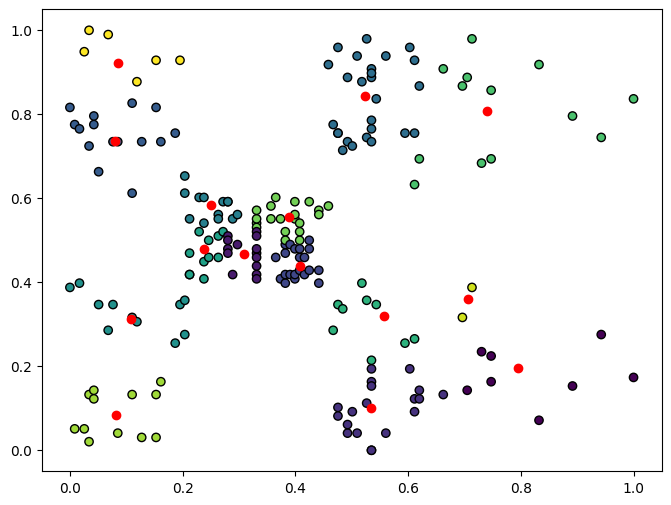

In [124]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

liste = range(2,16)
for i in liste:
    model = MiniBatchKMeans(n_clusters=i, batch_size=10,max_iter=1000 ,random_state=42)
    model.fit(X)

    print(model.cluster_centers_)

    x_predict = model.predict(X)
    print(x_predict)
    
    # Inertie
    print(f"Inertie : {model.inertia_}")

    # Calcul du silhouette score
    score = silhouette_score(X, model.labels_)
    print(f"Silhouette Score : {score:.3f}")
    print("K = ",i)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=x_predict,edgecolor='k')
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='red')
    plt.show()

D'apres les deux metrics silhouette et l'Inertie plus la visualisation le meilleur K est lui qui est égale à 5

[[0.3405313  0.49340468]
 [0.60661985 0.82783883]
 [0.0911021  0.79962894]
 [0.62062481 0.16443149]
 [0.0911021  0.19619666]]
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 0 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
Inertie : 3.665274881528352
Silhouette Score : 0.561


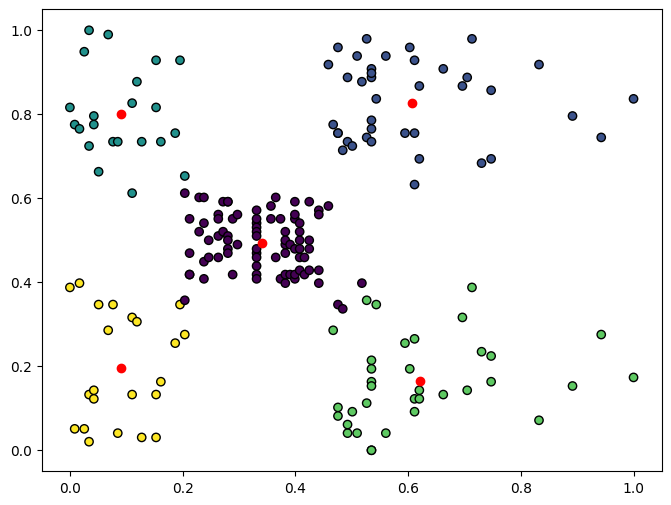

In [123]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

km = KMeans(5,max_iter=1000 ,random_state = 42)
km.fit(X)

print(km.cluster_centers_)

x_predict = km.predict(X)
print(x_predict)

# Inertie
print(f"Inertie : {km.inertia_}")

# Calcul du silhouette score
score = silhouette_score(X, km.labels_)
print(f"Silhouette Score : {score:.3f}")
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=x_predict,edgecolor='k')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red')
plt.show()


[[0.33651805 0.49217372]
 [0.6042054  0.82421726]
 [0.61299916 0.17444786]
 [0.09603489 0.80237176]
 [0.08839802 0.20935961]]
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
Inertie : 3.6740230787465546
Silhouette Score : 0.559


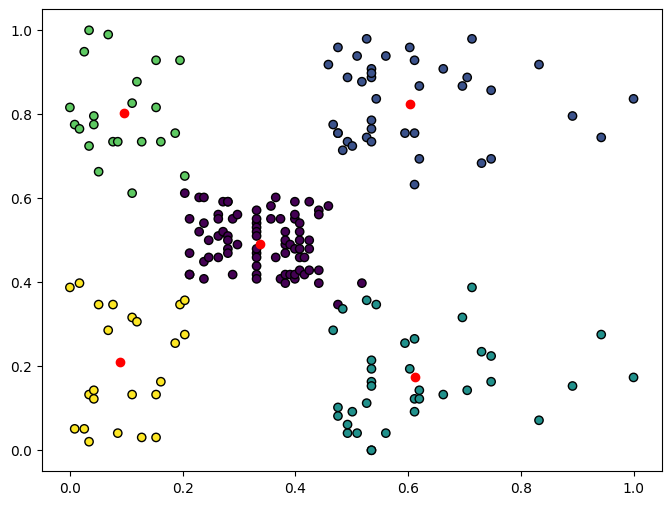

In [114]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

model = MiniBatchKMeans(n_clusters=5, batch_size=50, random_state=42)
model.fit(X)

print(model.cluster_centers_)

x_predict = model.predict(X)
print(x_predict)

# Inertie
print(f"Inertie : {model.inertia_}")

# Calcul du silhouette score
score = silhouette_score(X, model.labels_)
print(f"Silhouette Score : {score:.3f}")

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=x_predict,edgecolor='k')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='red')
plt.show()

In [95]:
df["Cluster"] = model.labels_
df

,Gender,Age,Annual_Income_K,Spending Score (1-100),Cluster
0,1,19,15.00,39,4
1,1,21,15.00,81,3
2,0,20,16.00,6,4
3,0,23,16.00,77,3
4,0,31,17.00,40,4
...,...,...,...,...,...
195,0,35,120.00,79,1
196,0,45,126.00,28,2
197,1,32,126.00,74,1
198,1,32,132.75,18,2


In [96]:
df.groupby("Cluster").mean()

,Gender,Age,Annual_Income_K,Spending Score (1-100)
Cluster,,,,
0,0.412500,42.937500,55.087500,49.712500
1,0.461538,32.692308,86.429487,82.128205
2,0.527778,40.666667,87.631944,17.583333
3,0.409091,25.272727,25.727273,79.363636
4,0.391304,45.217391,26.304348,20.913043


In [108]:
for i in range(len(df["Cluster"])):
    
    if df["Cluster"].iloc[i] == 0:
        df.loc[i,"Customer_type"] = "Average Spender" 
        
    if df["Cluster"].iloc[i] == 1:
        df.loc[i,"Customer_type"] = "Luxury Shopper"
         
    if df["Cluster"].iloc[i] == 2:
        df.loc[i,"Customer_type"] = "Luxury Shopper"
         
    if df["Cluster"].iloc[i] == 3:
        df.loc[i,"Customer_type"] = "Budget Shopper"
         
    if df["Cluster"].iloc[i] == 4:
        df.loc[i,"Customer_type"] = "Minimal Spender" 

df

,Gender,Age,Annual_Income_K,Spending Score (1-100),Cluster,Customer_type
0,1,19,15.00,39,4,Minimal Spender
1,1,21,15.00,81,3,Budget Shopper
2,0,20,16.00,6,4,Minimal Spender
3,0,23,16.00,77,3,Budget Shopper
4,0,31,17.00,40,4,Minimal Spender
...,...,...,...,...,...,...
195,0,35,120.00,79,1,Luxury Shopper
196,0,45,126.00,28,2,Luxury Shopper
197,1,32,126.00,74,1,Luxury Shopper
198,1,32,132.75,18,2,Luxury Shopper
